In [1]:
!pip install --upgrade pip 
!pip install --upgrade scikit-learn 
!pip install --upgrade numpy 
!pip install --upgrade scipy 
!pip install --upgrade pandas 

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.1
    Uninstalling scipy-1.8.1:
      Successfully uninstalled scipy-1.8.1
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 5.3 MB/s eta 0:00:00m eta 0:00:010:01:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2


# Εισαγωγή και επισκόπηση των δεδομένων.

## Ένα dataset αναγνώρισης αντικειμένων σε εικόνα

Σε αυτή την άσκηση θα προεπεξεργαστούμε μια σειρά χαρακτηριστικών χαμηλού επιπέδου που έχουν εξαχθεί από τμήματα εικόνων, και στη συνέχεια θα εκπαιδεύσουμε έναν νευρωνικό δίκτυο που θα τις κατατάσσει σε μία από τις 5 διαφορετικές κατηγορίες στις οποίες μπορεί να ανήκουν.

![alt text](https://cdn-images-1.medium.com/max/1600/1*r9ELExnk1B1zHnRReDW9Ow.png)

Ένα από τα πιο δημοφιλή προβλήματα στο χώρο της σημασιολογικής ανάλυσης πολυμεσικού υλικού αποτελεί η ταξινόμηση τμημάτων εικόνων με βάση το περιεχόμενο. Μια συνηθισμένη διαδικασία για την επίτευξη αυτού του σκοπού έχει ως εξής. Αρχικά ένας αλγόριθμος τμηματοποίησης επεξεργάζεται την εικόνα και τη χωρίζει σε περιοχές με παρόμοια χαρακτηριστικά χαμηλού επιπέδου (για παράδειγμα ιστογράμματα χρώματος, αναγνώριση ακμών κλπ). Τα τμήματα αυτά ταξινομούνται χειροκίνητα σύμφωνα με το περιεχόμενο τους σε κάποιες κατηγορίες. Με αυτό το τρόπο δημιουργείται ένα σύνολο εκπαίδευσης (χαρακτηριστικά και επιθυμητές αποκρίσεις) το οποίο χρησιμοποιείται από ένα νευρωνικό δίκτυο για την ταξινόμηση των τμημάτων της εικόνας. 

Σύμφωνα με την περιγραφή του dataset, οι πίνακες που μας δίνονται για την εκπαίδευση του δικτύου έχουν τα εξής περιεχόμενα:

1. Κάθε στήλη του πίνακα TrainData αντιστοιχεί στο τμήμα μίας εικόνας ενώ κάθε γραμμή περιέχει χαρακτηριστικά χαμηλού επιπέδου (που αντιστοιχούν σε Descriptors) του τμήματος αυτού. Σύμφωνα με την περιγραφή του dataset το σύνολο τμημάτων εικόνας (δειγμάτων) στο train set είναι 645 και το σύνολο των χαρακτηριστικών είναι 586 
2. Κάθε στήλη του πίνακα TrainDataTargets αντιστοιχεί στο τμήμα μίας εικόνας ενώ κάθε γραμμή αντιστοιχεί σε μία από τις κατηγορίες «Άλογο», «Σκύλος», «Πρόσωπο», «Αυτοκίνητο», «Ποδήλατο», «Λουλούδι» κ.ά. Γνωρίζουμε ότι το σύνολο των στηλών - δειγμάτων στο test set είναι 159 και ότι το σύνολο των κατηγοριών - γραμμών είναι 5 (Για την υλοποίηση της άσκησης έχουν δηλαδή επιλεξεί 5 μόνο κατηγορίες αντικειμένων). Στην περίπτωση που το τμήμα μιας εικόνας ανήκει σε μία από τις κατηγορίες τότε η αντίστοιχη γραμμή θα έχει την τιμή 1 ενώ οι υπόλοιπες γραμμές θα πάρουν την τιμή 0.

Τα δεδομένα των πινάκων TrainData, TrainDataTargets θα χρησιμοποιηθούν για την εκπαίδευση του νευρωνικού δικτύου ενώ τα δεδομένα των πινάκων TestData, TestDataTargets θα χρησιμοποιηθούν ως μέτρο των επιδόσεων του νευρωνικού δικτύου. Προφανώς τα δεδομένα των πινάκων TestData και TestDataTargets έχουν αντίστοιχη δομή με τα δεδομένα των πινάκων TrainData και TrainDataTargets. 

Οι πίνακες των χαρακτηριστικών και ετικετών του train και test set στην περίπτωση αυτή μας δίνονται έτοιμοι και δεν κάνουμε εμείς split του dataset.

Το πρώτο βήμα όταν διαχειριζόμαστε datasets είναι να τα εισάγουμε σωστά στο περιβάλλον μας και να βεβαιωθούμε ότι οι πίνακες έχουν τη σωστή μορφή.

## Εισαγωγή dataset

Θα εισάγουμε τα δεδομένα σε dataframes απευθείας από τα URL όπου είναι αποθηκευμένα.

In [2]:
import pandas as pd
trainData = pd.read_csv("http://mycourses.ntua.gr/document/goto/?url=%2F%C5%F1%E3%E1%F3%F4%DE%F1%E9%EF_2018_-_2019%2FLab_4%2Fdata_files%2FtrainData.csv&cidReq=ECE1078").values
trainDataTargets = pd.read_csv("http://mycourses.ntua.gr/document/goto/?url=%2F%C5%F1%E3%E1%F3%F4%DE%F1%E9%EF_2018_-_2019%2FLab_4%2Fdata_files%2FtrainDataTargets.csv&cidReq=ECE1078").values
testData = pd.read_csv("http://mycourses.ntua.gr/document/goto/?url=%2F%C5%F1%E3%E1%F3%F4%DE%F1%E9%EF_2018_-_2019%2FLab_4%2Fdata_files%2FtestData.csv&cidReq=ECE1078").values
testDataTargets = pd.read_csv("http://mycourses.ntua.gr/document/goto/?url=%2F%C5%F1%E3%E1%F3%F4%DE%F1%E9%EF_2018_-_2019%2FLab_4%2Fdata_files%2FtestDataTargets.csv&cidReq=ECE1078").values
print(trainData)
print(trainDataTargets)

[[   1  -66 -168 ...  -44 -124 -107]
 [   2  -72   70 ...   49   69   38]
 [   3 -124   70 ...    0   60    7]
 ...
 [ 584  129   25 ...   88   92  116]
 [ 585  127    5 ...   92  101  123]
 [ 586  139    5 ...  114  126  154]]
[[1 1 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [3 0 0 ... 1 1 1]
 [4 0 0 ... 0 0 0]
 [5 0 1 ... 0 0 0]]


Γνωρίζουμε ότι το csv μας περιέχουν μόνο αριθμητικά δεδομένα οπότε καλώντας τη μέθοδο .values τα δεδομένα μετατρέπονται αυτόματα σε πίνακα numpy αντί για data_frame. Προσοχή: σε csv που περιέχουν συνδυασμό strings και αριθμών ακολουθούμε τη μεθοδολογία με διαφορετικά dataframes ανάλογα τον τύπο δεδομένων που είδαμε στο τελευταίο section του notebook "Classification 1.1." 

## Επισκόπηση του Dataset

Αφού εισάγουμε τα δεδομένα και έχουμε τις κλάσεις με τις οποίες επιθυμούμε να δουλέψουμε, πρέπει να κάνουμε έναν αρχικό έλεγχο και να δούμε αν είναι σε κατάλληλη μορφή. Πολλές φορές τα δεδομένα έχουν αντίστροφα από το επιθυμητό τις σειρές και τις στήλες ή περιέχουν κατηγορίες (indexes) που κατά λάθος μπορεί να περάσουμε σαν έξτρα σειρές στους πίνακές μας. 

Σημείωση: ένας από τους λόγους που πολλοί επιστήμονες δεδομένων επιλέγουν να δουλεύουν με panda data_frames αντί απλά arrays είναι το ότι διαχειρίζονται αυτόματα τα indexes των δεδομένων. 

Πρέπει πάντοτε να κάνουμε μια επισκόπηση των πινάκων να δούμε αν είναι στη σωστή μορφή, ειδικά όταν δεν έχουμε dataset description (δηλαδή τι σημαίνουν οι κολώνες και οι γραμμές), όπως στην περίπτωση αυτή.

In [3]:
# παίρνουμε πρώτα τις διαστάσεις όλων των πινάκων
print(trainData.shape)
print(trainDataTargets.shape)
print(testData.shape)
print(testDataTargets.shape)
print("\n")

# κάνουμε μια πρώτη εκτύπωση των χαρακτηριστικών
print( trainData)
print(trainDataTargets)
print(testData)
print(testDataTargets)

(586, 646)
(5, 646)
(586, 160)
(5, 160)


[[   1  -66 -168 ...  -44 -124 -107]
 [   2  -72   70 ...   49   69   38]
 [   3 -124   70 ...    0   60    7]
 ...
 [ 584  129   25 ...   88   92  116]
 [ 585  127    5 ...   92  101  123]
 [ 586  139    5 ...  114  126  154]]
[[1 1 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [3 0 0 ... 1 1 1]
 [4 0 0 ... 0 0 0]
 [5 0 1 ... 0 0 0]]
[[   1 -153 -164 ...  -62  -96  -82]
 [   2   70   69 ...  -29  -16  -16]
 [   3   65   64 ... -126  -94 -108]
 ...
 [ 584   36   35 ...  139  130  139]
 [ 585    3    0 ...  150  128  144]
 [ 586    5    8 ...  177  141  165]]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

### Multi-class dataset format

Όταν έχουμε c διαφορετικές κλάσεις το scikit περιμένει το dataset να έχει την ακόλουθη μορφή:

- ο πίνακας των δεδομένων να έχει σχήμα (n samples, m features)
- ο πίνακας των ετικετών να έχει σχήμα(n samples, c κλάσεις)

Εάν έχουμε 3 κλάσεις και ένα δείγμα ανήκει στη δεύτερη (index 1) τότε η ετικέτα του θα είναι [0 1 0]. Αυτή είναι η πυκνή αναπαράσταση (dense). Μπορούμε επίσης να έχουμε την αραιή (sparse) αναπαράσταση:

- ο πίνακας των δεδομένων να έχει σχήμα (n samples, m features)
- ο πίνακας των ετικετών να έχει σχήμα (n samples, ετικέτα κλάσης)

ένα δείγμα της κατηγορίας 3 θα έχει ετικέτα '2' (δηλαδή 3 ξεκινώνατας το index από το 0). 

Το scikit καταλαβαίνει και τις δύο συμβάσεις για τις ετικέτες πολλών κατηγοριών. Τα ονόματα δεν χρειάζεται καν να είναι 0, 1, 2 κλπ, μπορούν να είναι και string αρκεί να είναι μοναδικά. Γενικά προτιμάται η αναπαράσταση sparse. H dense μετατρέπεται εσωτερικά σε sparse.


## Συμβατότητα με scikit-learn
Οι παρατηρήσεις που κάνουμε για τα δείγματα και τα χαρακτηριστικά  είναι δύο:
* Πρώτον, τα χαρακτηριστικά είναι σε γραμμές και τα δείγματα σε κολόνες. Αυτό είναι ασύμβατο με το scikit-learn 
* Δεύτερον, οι κολόνες - δείγματα αντί να είναι 645 όπως λέει η περιγραφή είναι 646. Από το print λοιπόν βλέπουμε ότι η διάσταση αυτή δεν συμπίπτει με την περιγραφή γιατί η πρώτη κολώνα είναι ένα index από 1 μέχρι το 586 των χαρακτηριστικών (και όχι δείγμα). 

Συνεπώς θα πρέπει να αφαιρέσουμε  αυτό το index (δεν αποτελεί δείγμα) και εν συνεχεία να κάνουμε αναστροφή στους πίνακες (που γινεται με τη μέθοδο ".Τ") ώστε να έχουμε δείγματα στις γραμμές και χαρακτηριστικά στις κολώνες (standard στο scikit-kearn). 

Παρόμοια για τις ετικέτες των κατηγοριών, αφενός η πρώτη κολόνα είναι πάλι ένα index από 1 έως 5 των κατηγοριών (που δεν το θέλουμε) και αφετέρου θέλουμε να έχουμε τα δείγματα σε γραμμές και τα 0 και 1 των κατηγοριών σε 5 κολόνες, οπότε θα χρειαστούμε και εκεί αναστροφή των πινάκων.

In [4]:
# C for Corrected
C_trainData = trainData.T[1:,]
C_testData = testData.T[1:,]
C_trainDataTargets = trainDataTargets.T[1:,]
C_testDataTargets = testDataTargets.T[1:,]

print(C_trainData.shape)
print(C_trainDataTargets.shape)
print(C_testData.shape)
print(C_testDataTargets.shape)
print("\n")

#τυπώνουμε τις 5 πρώτες γραμμές και κολόνες
print(C_trainData[:5,:5])
print(C_trainDataTargets[:5,:5])
print(C_testData[:5,:5])
print(C_testDataTargets[:5,:5])

(645, 586)
(645, 5)
(159, 586)
(159, 5)


[[ -66  -72 -124   54   26]
 [-168   70   70    8    8]
 [-172   72   54   18    8]
 [ -63  -23  -99   54  -18]
 [ -62   43  -18   63    8]]
[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 1 0 0 0]]
[[-153   70   65    3    5]
 [-164   69   64   15    8]
 [-157   73   71    2    8]
 [-133   63   71   -2    1]
 [-137   65   71    4    8]]
[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


Συμπερασματικά: είναι πάντα καλή πρακτική να κάνουμε μια ποιοτική επισκόπηση του dataset και να εξετάζουμε αν οι πίνακες των δεδομένων είναι στη σωστή μορφή και να τους διορθώνουμε αν χρειαστεί. Μπορούμε να έχουμε ή να μην έχουμε ονόματα χαρακτηριστικών στην πρώτη γραμμή η κολώνα, αρίθμηση σειρών, να λείπουν τιμές χαρακτηριστικών, να έχουμε μαζί αριθμητικές και κατηγορικές μεταβλητές (strings) 

## Ένα απλό Multi Layer Perceptron (MLP)
Στη συνέχεια θα κάνουμε κάποιες διαδικασίες προεπεξεργασίας στα δεδομένα για να βελτιώσουμε την απόδοση των ταξινομητών. Για να δούμε τη διαφορά πριν και μετά την προεπεξεργασία, κάνουμε εκπαίδευση σε ένα Multi Layer Perceptron (MLP) με παραμέτρους (σταθερές, που δεν τις βελτιστοποιούμε) και μη επεξεργασμένα δεδομένα και υπολογίζουμε precision, recall, f1. Θα δούμε ότι το MLP αδυνατεί να μάθει να κάνει προβλέψεις. Σημειώστε επίσης ότι καλούμε τη μέθοδο fit στα δεδομένα train, και τη μέθοδο predict στα δεδομένα test.

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)
clf.fit(C_trainData, C_trainDataTargets)
preds = clf.predict(C_testData)
print(classification_report(C_testDataTargets, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        31

   micro avg       0.00      0.00      0.00       159
   macro avg       0.00      0.00      0.00       159
weighted avg       0.00      0.00      0.00       159
 samples avg       0.00      0.00      0.00       159



/home/chris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/chris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Το μοντέλο **δεν λειτουργεί** για δύο βασικούς λόγους:
1. δεν έχει γίνει επαρκής προεπεξεργασία στα πρότυπα εισόδου
2. οι υπερπαράμετροι του μοντέλου, όπως ο αριθμός των νευρώνων του κρυμμένου επιπέδου, δεν είναι βελτιστοποιημένοι. Σημειώστε ότι το MLP έχει ένα [πάρα πολύ μεγάλο πλήθος υπερπαραμέτρων](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

# Προεπεξεργασία δεδομένων

Αφού εισάγαμε τα δεδομένα και κάναμε μια πρώτη επισκόπηση και τα φέραμε στη σωστή μορφοποίηση, περνάμε στο επόμενο στάδιο, αυτό της προεπεξεργασίας (data preprocessing). Σε πολλά προβλήματα ταξινόμησης (και machine learning γενικότερα) η προεπεξεργασία είναι ένα πολύ σημαντικό κομμάτι (και συχνά πολύ χρονοβόρο) ολόκληρης της διαδικασίας το οποίο όμως συχνά έχει πολύ μεγάλο αντίκτυπο στην επίδοση του συστήματος. 

Τα βήματα προεπεξεργασίας στοχεύουν:
* Στην αφαίρεση η αντικατάσταση απουσιάζουσων τιμών από το dataset
* Στη μετατροπή των κατηγορικών μεταβλητών κατάλληλα ώστε να μπορούν να τους διαχειριστούν αλγόριθμοι μηχανικής μάθησης
* Στην επιλογή ή εξαγωγή των κατάλληλων χαρακτηριστικών για το μοντέλο μας

## Απουσιάζουσες τιμές χαρακτηριστικών

Επειδή τα datasets δημιουργούνται από μετρήσεις ή αντικείμενα του πραγματικού κόσμου, δεν είναι σπάνιο να υπάρχουν απουσιάζουσες τιμές κάποιων χαρακτηριστικών σε έναν αριθμό δειγμάτων. Ωστόσο, η είσοδος στους αλγόριθμους ΜΜ πρέπει να είναι πληρης. 



In [6]:
from io import StringIO

csv_data = '''A,B,C,D \n 1.0,2.0,3.0,4.0 \n 5.0,6.0,NaN,8.0 \n 10.0,11.0,12.0,NaN'''
print(csv_data)

df = pd.read_csv(StringIO(csv_data))
print(df)

A,B,C,D 
 1.0,2.0,3.0,4.0 
 5.0,6.0,NaN,8.0 
 10.0,11.0,12.0,NaN
      A     B     C   D 
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN


Με την StringIO διαβάζουμε σε ένα dataframe από ένα string ως να ήταν CSV αρχείο στο δίσκο. Παρατηρούμε ότι στο CSV λείπουν δύο τιμές τις οποίες το dataframe αντιλαμβάνεται και αντικαθιστά με "NaN" ("Not A Number").

Μια στρατηγική θα ήταν να αφαιρέσουμε τα δείγματα (γραμμές) που έχουν χαρακτηριστικά με απουσιάζουσες τιμές ή παρόμοια τα χαρακτηριστικά αν σε κάποια δείγματα απουσιάζουν



In [7]:
df.dropna(axis=0) # κρατάμε μόνο τα δείγματα με αριθμητικές τιμές

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [8]:
df.dropna(axis=1) # κρατάμε μόνο τα χαρακτηριστικά με αριθμητικές τιμές

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


(η μέθοδος dropna έχει πολλά ακόμη [options](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html))

Σημειώστε ότι αυτή μεθοδολογία είναι η μόνη μορφή προεπεξεργασίας που καλύτερο είναι να γίνει πριν διαχωρίσουμε σε train και test. Aν έχουμε κάνει το διαχωρισμό θα πρέπει ότι χαρακτηριστικό (στήλη) αφαιρέσουμε στο ένα, να το αφαιρέσουμε και στο άλλο.

Μπορεί αυτή η προσέγγιση να είναι μοιάζει απλή, ωστόσο ειδικά αν απουσιάζουν πολλές τιμές, συνήθως δεν θέλουμε να θυσιάσουμε δεδομένα (δείγματα ) ούτε να αφαιρέσουμε χαρακτηριστικά που μπορεί να περιλαμβάνουν σημαντική πληροφορία για το διαχωρισμό των κλάσσεων.

Πρακτικά συνήθως χρησιμοποιούμε το μετασχηματιστή “[Imputer](http://scikit-learn.org/stable/modules/impute.html)” του scikit learn που αντικαθιστά κάθε απουσιάζουσα τιμή χαρακτηριστικού με τη μέση τιμή (συνεχείς μεταβλητές) ή την πιο συχνή τιμή (κατηγορικές μεταβλητές) του χαρακτηριστικού στο train set. 


Αν θεωρήσουμε ότι το df είναι το training set τότε:


In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

df.replace('nan',np.NaN,inplace=True)
imp=SimpleImputer(missing_values=np.NaN,strategy='mean')

idf=pd.DataFrame(imp.fit_transform(df))
idf.columns=df.columns
idf.index=df.index

print(idf)

      A     B     C   D 
0   1.0   2.0   3.0  4.0
1   5.0   6.0   7.5  8.0
2  10.0  11.0  12.0  6.0


Αν τώρα έχουμε ένα test set με missing values οι τιμές θα αντικατασταθούν με τις μέσες / πιο συχνές τιμές που έχουν υπολογιστεί στο **train set**.

In [10]:
csv_data = '''A,B,C,D \n 3.0,4.0,,1.0 \n 5.0,2.0,10.0,6.0'''

test_df = pd.read_csv(StringIO(csv_data))
print(test_df)
imputed_test_data = imp.transform(test_df.values)
imputed_test_data

     A    B     C   D 
0  3.0  4.0   NaN  1.0
1  5.0  2.0  10.0  6.0


/home/chris/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[ 3. ,  4. ,  7.5,  1. ],
       [ 5. ,  2. , 10. ,  6. ]])

Ο μετασχηματισμός με Imputer γίνεται στην απόλυτη αρχή της προεπεξεργασίας.

## Μετασχηματικές και Εκτιμητές στο scikit-learn

Η κλάση Imputer που είδαμε προηγουμένως ανήκει στο scikit στη κατηγορία των λεγόμενων μετασχηματιστών (**transformers**). Οι μετασχηματιστές έχουν δύο βασικές μεθόδους, την fit και την transform. Με την fit μαθαίνουν κάποιες παραμέτρους (πχ προηγουμένως τη μέση τιμή) με βάση τα δεδομένα train και με την transform μπορούν να μετασχηματίσουν τα δεδομένα (train ή test) βάσει των παραμέτρων που έχουν μάθει.
![alt text](https://i.imgur.com/uqtJyI8.jpg)

Η δεύτερη μεγάλη κλάση του scikit learn είναι οι εκτιμητές (**estimators**). Αυτό που τους διαφοροποιεί είναι ότι ενώ έχουν τις δικές τους μεθόδους fit και σε κάποιες περιπτώσεις και transform, έχουν επιπλέον τη μέθοδο predict, που κάνει τις προβλέψεις πάνω στα δεδομένα του test set. Οι ταξινομητές στην επιβλεπόμενη μάθηση είναι λοιπόν όλοι τους εκτιμητές, αφόσον κάνουν fit πάνω στα δεδομένα train και predict στα δεδομένα test.

![alt text](https://i.imgur.com/jhExL9i.jpg)

Θα δούμε στη συνέχεια ότι μπορούμε να σχηματίζουμε αλυσίδες πολλών διαδοχικών μετασχηματιστών που καταλήγουν σε έναν εκτιμητή, τα λεγόμενα pipelines.

## Αριθμητικά και κατηγορικά χαρακτηριστικά
Σε κάποιες περιπτώσεις τα datasets περιέχουν εκτός από αριθμητικά και κατηγορικά χαρακτηριστικά στη μορφή string. Για παράδειγμα:

In [11]:
# Όνομα Ηλικία Βάρος Κάτοικος
MixedType = np.array([
    ['John', 25, 63.2, 'UK'],
    ['Maria', 62, 54.3, 'US'],
    ['Nick', 18, 70.3, 'US'],
])
print(MixedType)

[['John' '25' '63.2' 'UK']
 ['Maria' '62' '54.3' 'US']
 ['Nick' '18' '70.3' 'US']]


Για να μπορέσει ο αλγόριθμος να λειτουργήσει, θα μπορούσε κανείς να σκεφτεί να 
αντικαταστήσει κάθε διαφορετική τιμή κάθε κατηγορικού χαρακτηριστικού με μια αριθμητική τιμή. Στο προηγούμενο παράδειγμα να θέσει John=0, Maria=1, Nick=2 και Europe=0, US=1. Αυτό όμως είναι λάθος γιατί θεωρεί ότι το σύνολο τιμών των δύο κατηγορικών μεταβλητών είναι διατεταγμένο (ordered) κάτι που προφανώς δεν ισχύει και θα οδηγήσει τον ταξινομητή σε λάθη.

Μια λύση είναι να μετατρέψουμε κάθε κατηγορικό χαρακτηριστικό με m τιμές σε m binary χαρακτηριστικά από τα οποία μόνο ένα είναι ενεργό κάθε φορά:

In [12]:
# μετατρέπουμε σε dataframe και τυπώνουμε
mtdf = pd.DataFrame(MixedType)
print(mtdf)
# οι κολόνες 1 και 4 έχουν κατηγορικές μεταβλητές. 
# Με την "get_dummies" κάνουμε τη μετατροπή σε binary χαρακτηριστικά που περιγράψαμε
dummies = pd.get_dummies(mtdf, columns=[0,3])
print(dummies)
# Μετατρέπουμε σε αριθμητικές τιμές (pd.to_numeric) και σε numpy array (.values)
np_dummies = dummies.apply(pd.to_numeric).values
print(np_dummies)

       0   1     2   3
0   John  25  63.2  UK
1  Maria  62  54.3  US
2   Nick  18  70.3  US
    1     2  0_John  0_Maria  0_Nick  3_UK  3_US
0  25  63.2       1        0       0     1     0
1  62  54.3       0        1       0     0     1
2  18  70.3       0        0       1     0     1
[[25.  63.2  1.   0.   0.   1.   0. ]
 [62.  54.3  0.   1.   0.   0.   1. ]
 [18.  70.3  0.   0.   1.   0.   1. ]]


Θα πρέπει εδώ να σημειώσουμε την ειδική περίπτωση όπου ένα αριθμητικό χαρακτηριστικό είναι και αυτό κατηγορικό. Αν κάποια χαρακτηριστικά είναι αριθμητικά και αναφέρονται ως κατηγορικά, σημαίνει ότι έχουν ένα ορισμένο και πεπερασμένο σύνολο τιμών. Διακρίνουμε δύο περιπτώσεις: αν το σύνολο τιμών είναι διατεταγμένο (πχ size: "10" "20" "30") δεν χρειάζεται μετατροπή σε δυαδικά χαρακτηριστικά. Αν όμως το σύνολο τιμών είναι αριθμητικό αλλά μη διατεταγμένο, τότε χρειάζεται. Παράδειγμα person: "1" "2" "3", όπου 1 σημαίνει "γυναίκα", 2 "άνδρας" και 3 "παιδί".

Τέλος, τα ονομαστικά χαρακτηριστικά μπορούν να είναι και αυτά διατεταγμένα πχ οι τιμές "(M)edium", "(L)arge", "E(X)tra Large": 


In [13]:
cdf = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
cdf.columns = ['color', 'size', 'price', 'classlabel']
cdf

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


Σε αυτήν την περίπτωση μπορούμε να αποφύγουμε τη μετατροπή σε δυαδικά χαρακτηριστικά, αλλά θα πρέπει να ορίσουμε ρητά μια αντιστοίχιση που να σέβεται την διάταξη των κατηγορικών τιμών:

In [14]:
size_mapping = {'XL': 3, 'L': 2, 'M': 1}
cdf['size'] = cdf['size'].map(size_mapping)
cdf

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


Οι μετατροπές χαρακτηριστικών πρέπει να είναι οι ίδιες στο train και test set και γίνονται μετά τη διαχείριση τιμών που απουσιάζουν.

## Κωδικοποίηση των ετικετών των κατηγοριών

Πολλές βιβλιοθήκες μηχανικής μάθησης απαιτούν οι ετικέτες κλάσης να κωδικοποιούνται ως ακέραιοι αριθμοι. Αν και οι περισσότεροι εκτιμητές για ταξινόμηση στο scikit-learn μετατρέπουν εσωτερικά τις 
ετικέτες σε ακέραιους αριθμούς, θεωρείται καλή πρακτική η παροχή ετικετών κλάσης ως ακέραιους
για να αποφευχθούν τυχόν  δυσλειτουργίες. Για την κωδικοποίηση των ετικετών κλάσης, μπορούμε να χρησιμοποιήσουμε μια προσέγγιση παρόμοια με την αντιστοίχιση των διατεταγμένων χαρακτηριστικών που κάναμε προηγουμένως. Οι ετικέτες κλάσης δεν είναι διατεταγμένες και άρα δεν έχει σημασία ο ακέραιος αριθμός που εκχωρούμε σε μια συγκεκριμένη ετικέτα, αρκεί να είναι μοναδικός. Έτσι, μπορούμε απλά να απαριθμήσουμε το ετικέτες κλάσης, ξεκινώντας από το 0:

In [15]:
# βρίσκουμε τις μοναδικές ετικέτες
class_mapping = {label:idx for idx,label in enumerate(np.unique(cdf['classlabel']))}
class_mapping
# και κάνουμε την μετατροπή
cdf['classlabel'] = cdf['classlabel'].map(class_mapping)  
cdf

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


## Η κατάρα της διαστατικότητας (Curse of dimensionality)

Μια πολύ σημαντική παράμετρος για την απόδοση των ταξινομητών είναι η διασταστικότητα των δεδομένων, ιδιαίτερα σε σχέση με τον διαθέσιμο αριθμό δειγμάτων. Γενικά και ανεξάρτητα από το μοντέλο του ταξινομητή, η απόδοση αυξάνεται όσο αυξάνεται το πλήθος και η ποιότητα των δεδομένων και όσο μειώνεται η διαστατικότητα. Αντίστροφα, τα προβλήματα δυσκολεύουν όσο η διαστατικότητα αυξάνεται και τα δείγματα δεν επαρκούν για να καλύψουν όλες τις κατηγορίες του προβλήματος. Αναφερόμαστε στο πρόβλημα αυτό ως την κατάρα της διαστατικότητας (the curse of dimensionality): όσο αυξάνει η διαστατικότητα, τόσο τα διαθέσιμα δεδομένα γίνονται αραιά (sparse). 

Ας πούμε ότι έχουμε n-διαστάσεων κατηγορικές μεταβλητές, με δυαδικές τιμές $x_n = 0$ ή $x_n = 1$, που περιγράφουν πχ. εικόνες. Θέλουμε να μετρήσουμε πόσα αντιπροσωπευτικά παραδείγματα πρέπει να έχουμε για να καλύψουμε όλες τις κατηγορίες. Αν n=1, θέλουμε 2 παραδείγματα, αν n=2 θέλουμε 4 κ.ο.κ. δηλαδή θέλουμε $n^2$ παραδείγματα ανάλογα την διάσταση. Εάν όμως έχουμε πάνω από 2 κατηγορίες σε κάθε μεταβλητή, δηλαδή $x_n = r, r >2$, τότε αντίστοιχα έχουμε $n^r$ δυνατές *περιοχές* που χωρίζουμε τον υπερχώρο.

Στο παράδειγμα μας οι μεταβλητές έχουν διάσταση n = 586 με πραγματικές τιμές και μόνο 645 δείγματα, επομένως καταλαβαίνει κανείς ότι χωρίς μείωση της διάστασης των μεταβλητών εισόδου με κάποιον τρόπο, η απόδοση όποιου ταξινομητή και να χρησιμοποιήσουμε θα υπονομεύεται από τον μικρό αριθμό παραδειγμάτων, δεδομένης της διαστατικότητας.


![alt text](https://www.kdnuggets.com/wp-content/uploads/curse-dimensionality-2.png)


Σε γενικές γραμμές λοιπόν οι πολύ μεγάλες διαστάσεις του χώρου εισόδου (χαρακτηριστικών) κάνουν δυσκολότερο για τον ταξινομητή να υπολογίσει το σύνορο απόφασης μεταξύ των κλάσεων και αυξάνουν τις απαιτήσεις χώρου και χρόνου εκπαίδευσης ή/και ταξινόμησης. 

Για να μειωθεί η διαστατικότητα των δεδομένων χρησιμοποιούμε τεχνικές **μείωσης διαστατικότητας (dimensionality reduction)**. To dimensionality reduction γίνεται με τεχνικές επιλογής χαρακτηριστικών (feature selection) όπου ουσιαστικά αφαιρούμε κάποια χαρακτηριστικά με βάση ένα κριτήριο χωρίς μετασχηματισμό των τιμών τους και τεχνικές εξαγωγής χαρακτηριστικών (feature extraction), όπου μετασχηματίζουμε τις τιμές των χαρακτηριστικών σε νέες (εξάγουμε δηλαδή νέα χαρακτηριστικά) αλλά σε ένα χώρο μικρότερων διαστάσεων.

## Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών

Για την επιλογή χαρακτηριστικών υπάρχουν πολλές διαφορετικές τεχνικές (πχ [εδώ](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) οι επιλογές του scikit-learn). Μια απλή τεχνική επιλογής χαρακτηριστικών είναι το ελάχιστο κατώφλι της διακύμανσης (Variance threshold). Σε γενικές γραμμές αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. Ειδικά στην περίπτωση που η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό έχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, δεν χρησιμεύει καθόλου στον ταξινομητή για να αποφασίσει αν ένα δείγμα ανήκει σε μία κλάση ή σε μια άλλη και επιπλέον μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανονικοποίηση των χαρακτηριστικών. 

Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση VarianceThreshold για να αφαιρέσουμε τα  χαρακτηριστικά στο training set που έχουν μηδενική διακύμανση (default) ή πολύ χαμηλή. Πρέπει επίσης να πάρουμε μια μάσκα (index) των χαρακτηριστικών που επιλέγουμε, ώστε να την εφαρμόσουμε και στα δεδομένα train ώστε να έχουν τις ίδιες διαστάσεις. Αυτό δεν σπάει τον κανόνα ότι δεν χρησιμοποιούμε τα δεδομένα test γιατί μπορούμε να θεωρήσουμε ότι ο ταξινομητής απλώς αγνοεί τις εισόδους που δεν περιλαμβάνονται στη μάσκα.  Ας δούμε τη VarianceThreshold σε ένα toy dataset:

In [16]:
from sklearn.feature_selection import VarianceThreshold

train = np.array([[2, 2, 0, 3], [3, 1, 4, 3], [0, 1, 1, 3]])
print(train)
# αρχικοποιούμε έναν selector
selector = VarianceThreshold()
# όπως κάναμε και με τους ταξινομητές τον κάνουμε fit στα δεδομένα εκπαίδευσης
train_reduced = selector.fit_transform(train)
print(train_reduced)
# φτιάχνουμε μια μάσκα που μας λέει αν ο selector κρατάει ένα χαρακτηριστικό ή όχι
mask = selector.get_support()
print(mask)

test = np.array([[1, 2, 5, 3], [3, 4, 0, 3], [0, 3, 2, 0]])
print(test)
# καθώς δεν ξέρουμε τι θα συμβεί στο test set μπορεί η υπόθεση της μηδενικής διακύμανσης του 4ου χαρακτηριστικού να μην είναι απόλυτα σωστή. Ωστόσο θα είναι πρακτικά αμελητέα.

#test_reduced = test[:,mask]

test_reduced = selector.transform(test)
print(test_reduced)

[[2 2 0 3]
 [3 1 4 3]
 [0 1 1 3]]
[[2 2 0]
 [3 1 4]
 [0 1 1]]
[ True  True  True False]
[[1 2 5 3]
 [3 4 0 3]
 [0 3 2 0]]
[[1 2 5]
 [3 4 0]
 [0 3 2]]


Ενώ οι σταθερές τιμές πρέπει να αφαιρούνται κατά κανόνα πάντα, μπορεί κανείς να δοκιμάσει με μεγαλύτερα κατώφλια από μηδέν, αφαιρώντας και χαρακτηριστικά που έχουν κάποια διακύμανση και να αξιολογεί την επίδραση που έχει η περαιτέρω μείωση των διαστάσεων στην επίδοση του ταξινομητή. Για να καταλάβουμε τι τιμές μπορούμε να δοκιμάζουμε στο κατώφλι πρέπει να δούμε τη διακύμανση όλων των μεταβλητών: 


In [17]:
X = [[2, 2, 0, 3], [3, 1, 4, 3], [0, 1, 1, 3]]
Xvar = np.var(X, axis=0)
print(Xvar)

[1.55555556 0.22222222 2.88888889 0.        ]



Με αυτό τον τρόπο αφαιρούμε τις κολόνες με 0 variance (σταθερές) από το αρχικό dataset αναγνώρισης αντικειμένων μας:

In [18]:
selector = VarianceThreshold(threshold=0.5)
train_reduced = selector.fit_transform(C_trainData)
mask = selector.get_support()
test_reduced = C_testData[:,mask]

print(train_reduced.shape)
print(test_reduced.shape)
# διαπιστώνουμε σημαντική μείωση του αριθμού χαρακτηριστικών από 586 που ήταν αρχικά

(645, 326)
(159, 326)


## Κανονικοποίηση χαρακτηριστικών

Μετά την επιλογή χαρακτηριστικών η επόμενη τεχνική προεπεξεργασίας που μπορούμε να κάνουμε είναι η κανονικοποίηση των χαρακτηριστικών. Χαρακτηριστικά με πολύ μεγάλες διαφορές στις απόλυτες τιμές τους μπορούν να προκαλέσουν προβλήματα στην εκπαίδευση και να δώσουν ταξινομητές με μη βέλτιστη απόδοση. Για παράδειγμα, ένα χαρακτηριστικό με πολύ μεγάλες τιμές θα έχει μεγαλύτερη επίδραση στον υπολογισμό της απόστασης στον kNN από τι ένα με μικρές τιμές, χωρίς αυτό να σημαίνει απαραίτητα ότι είναι περισσότερο καθοριστικό για το διαχωρισμό των κλάσεων. Η κανονικοποίηση μετασχηματίζει τις τιμές των χαρακτηριστικών ώστε να αμβλυνθούν αυτές οι διαφορές.

Η κανονικοποίηση των χαρακτηριστικών μπορεί να γίνει με 2 βασικούς τρόπους, γνωστούς και από τη στατιστική. Με την διαίρεση με τη διαφορά μεγίστου-ελαχίστου (feature scaling) οπότε οι τιμές όλων των χαρακτηριστικών κλιμακώνονται γραμμικά στο διάστημα [0,1] ή με το z-score (ή standard score) του κάθε χαρακτηριστικού (standardization), που κάνει το χαρακτηριστικό να έχει μέση τιμή μηδέν και διακύμανση μονάδα, σαν την κανονική κατανομή. 

Η μετατροπή μεγίστου ελαχίστου γίνεται με τον τύπο: $$X' = {X - X_{min} \over X_{max} - X_{min}}$$Η μετατροπή σε standard score γίνεται με τον τύπο: $$z = {X- \mu \over \sigma}$$ όπου: $μ$ είναι η μέση τιμή του χαρακτηριστικού και $σ$ η απόκλιση. 

Στην πράξη, δεν μας ενδιαφέρει αν η πραγματική κατανομή των χαρακτηριστικών είναι κανονική, απλά αφαιρούμε τη μέση τιμή και διαιρούμε με την απόκλιση για να έχουν τα χαρακτηριστικά της.

H μετατροπή σε standard score είναι απαραίτητη σε πολλούς ταξινομητές για να συμπεριφερθούν σωστά. Επίσης είναι πιο ανθεκτική από την min-max σε τιμές outliers δηλαδή σποραδικές τιμές που είναι πολύ μακριά απο τη μέση τιμή και τις υπόλοιπες τιμές του χαρακτηριστικού (η min-max θα συμπιέσει τις περισσότερες τιμές σε ένα μικρό διάστημα)

Από την άλλη, η κλιμάκωση σε [0,1] είναι λιγότερο ευαίσθητη σε πολύ μικρές αποκλίσεις και επίσης σε αραιά (sparse) διανύσματα χαρακτηριστικών (δηλαδή με πολλές μηδενικές τιμές) η εφαρμογή της διατηρεί τα μηδέν, κάτι που μπορεί να είναι καθοριστικό για την ταχύτητα εκπαίδευσης.

10 τυχαίες τιμές από -30 ως 30


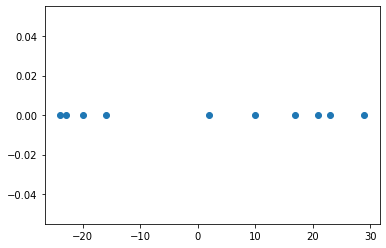

οι προηγούμενες 10 τιμές από -30 ως 30 και το οutlier 100


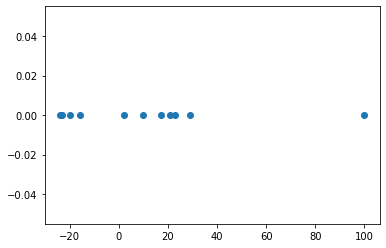

οι προηγούμενες 11 τιμές κανονικοποιημένες στο [0,1]


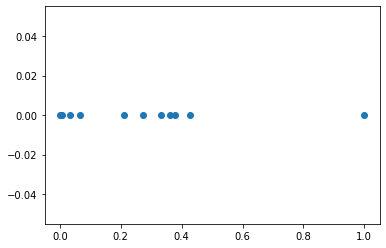

οι προηγούμενες 11 standarized


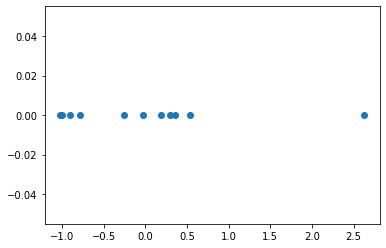

In [19]:
import matplotlib.pyplot as plt
from scipy import stats as st

x= np.random.randint(-30,30, size=10)
y = [0]*len(x)
plt.scatter(x,y)
print("10 τυχαίες τιμές από -30 ως 30")
plt.show()

# προσθέτουμε τον outlier 100
x = np.append(x,100)
y = [0]*len(x)
plt.scatter(x,y)
print("οι προηγούμενες 10 τιμές από -30 ως 30 και το οutlier 100")
plt.show()

# κανονικοποίηση στο [0,1] με min max
min_max_x = (x - np.min(x) )/ (np.max(x) - np.min(x))
plt.scatter(min_max_x,y)
print("οι προηγούμενες 11 τιμές κανονικοποιημένες στο [0,1]")
plt.show()

# standardization
std_x = st.zscore(x)
plt.scatter(std_x,y)
print("οι προηγούμενες 11 standarized")
plt.show()

Παρατηρούμε ότι το min-max scaling μας στέλνει τις τιμές εκτός του outlier πολύ κοντά στο μηδέν και τις πιέζει εντός του \[0, 0.4\] περίπου , ενώ το z-score διατηρεί μεν το μακρινό outlier, αλλά αφήνει και τις υπόλοιπες τιμές να έχουν ένα εύρος περίπου στο \[-1, 0.5\] και να διαφοροποιούνται. Αλγόριθμοι όπως ο backpropagation για τα νευρωνικά δίκτυα συγκλίνουν γενικά καλύτερα με την κανονικοποίηση z-score.

Ας εφαρμόσουμε τις δύο κανονικοποιήσεις σε ένα toy dataset:

In [20]:
from sklearn import preprocessing
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

X_test = np.array([[ -3., -1.,  4.],
                  [ 3., 4., 2.]])

# standardization των features του training set
X_train_scaled = preprocessing.scale(X_train)
print(X_train_scaled)
# μέση τιμη και απόκλιση των scaled χαρακτηριστικών
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
[0. 0. 0.]
[1. 1. 1.]


**Προσοχή:** ό,τι μετασχηματισμό κανονικοποίησης κάνουμε στο train set, θα τον κάνουμε και στο test set, χρησιμοποιώντας όμως απαραίτητα το max ή τα $μ$ και $σ$ που έχουμε βρει στο train set, πράγμα που σημαίνει ότι στο test set μετά την κανονικοποίηση δεν θα έχουμε απαραίτητα παντού τιμές μεταξύ 0 και 1 και αντίστοιχα ούτε μέση τιμή 0 και διακύμανση 1.

In [21]:
# όριζουμε ένα αντικείμενο scaler και το κάνουμε fit στο train set
scaler = preprocessing.StandardScaler().fit(X_train)
# εφαρμόζουμε τον scaler στα δεδομένα test. ΠΡΟΣΟΧΗ μέθοδος transform, όχι fit!
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

# και τυπώνουμε τη μέση τιμ;h και απόκλιση του test set 
print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))


[[-4.89897949 -1.22474487  2.93987366]
 [ 2.44948974  4.89897949  1.33630621]]
[-1.22474487  1.83711731  2.13808994]
[3.67423461 3.06186218 0.80178373]


In [22]:
# το ίδιο με  min max scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
print(X_train_minmax, "\n")
X_test_minmax = min_max_scaler.transform(X_test)
print(X_test_minmax)
# παρατηρούμε ότι στο test set έχουμε τιμές εκτός [0,1] γιατί στο train set το min ήταν -1 και το max 2

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]] 

[[-1.5         0.          1.66666667]
 [ 1.5         2.5         1.        ]]


Θα εφαρμόσουμε κανονικοποίηση με standardization στο (διορθωμένο και με επιλογή χαρακτηριστικών) dataset μας. Παρατηρήστε ότι μετασχηματίζουμε και τα δεδομένα του test, ΟΜΩΣ με το μετασχηματιστή που έχουμε μάθει στο training set. Έτσι δεν κάνουμε το λάθος να χρησιμοποιήσουμε δεδομένα test για εκπαίδευση.

In [23]:
scaler = preprocessing.StandardScaler().fit(train_reduced)
train_scaled = scaler.transform(train_reduced)
test_scaled = scaler.transform(test_reduced)

**ΠΡΟΣΟΧΗ**
* Aν θέλουμε να δοκιμάσουμε κατώφλια μεγαλύτερα του 0 στο VarianceThreshold, πρέπει πρώτα να εφαρμόσουμε τον minmaxscaler (γιατί οι μεταβλητές με μεγάλες μέσες τιμές θα δώσουν γενικά μεγαλύτερη τιμή variance)
* H εφαρμογή του VarianceThreshold δεν έχει προφανώς νόημα μετά το StandarScaler (γιατί όλες οι μεταβλητές έχουν variance 1 μετά το transform)

## Εξισορρόπηση μη ισορροπημένων datasets

Με τον όρο μη ισορροπημένο dataset εννούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Χωρίς να υπάρχει κάποια συνολική απάντηση, όταν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3, μπορούμε να αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο (imbalanced). Στα πραγματικά datasets αυτό είναι κάτι πολύ κοινό. Οι περισσότεροι ταξινομητές ωστόσο εκπαιδεύονται καλύτερα όταν τα δείγματα όλων των κλάσεων είναι σχετικά ισάριθμα.  

Για να δούμε αν το dataset μας είναι ισορροπημένο ή μη, θα δούμε πόσα δείγματα έχουμε ανά κατηγορία στο training set. Εφόσον κάθε δείγμα ανήκει σε μια μόνο από τις 5 κατηγορίες κάνουμε απλά: 

In [24]:
summ = C_trainDataTargets.T.sum(axis=1)
print(summ)

[170 122 120 107 126]


Τα δεδομένα εκπαίδευσης δεν έχουν ισορροπημένα πλήθη ανά κατηγορία με την πιο συχνή κατηγορία να διαφέρει σημαντικά από τη λιγότερο συχνή.

Έχουμε δύο βασικούς τρόπους για να εξισσοροπούμε ένα dataset, την υποδειγματοληψία (undersampling) και την υπερδειγματοληψία (oversampling). Εν ολίγοις, στο undersampling απλά αφαιρούμε τυχαία δείγματα από όλες τις κατηγορίες που έχουν μεγαλύτερο πλήθος από τη μικρότερη, ενώ στο oversampling επιλέγουμε τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε. Στην πρώτη δηλαδή αφαιρούμε δεδομένα ενώ στην άλλη προσθέτουμε. 

Γενικά το oversampling ενδείκνυται περισσότερο, αφού δεν χάνουμε δεδομένα εκπαίδευσης. Επίσης, σε κάποιους αλγορίθμους όπως πχ. random forests, έχει παρατηρηθεί ότι τα αποτελέσματα βελτιώνονται ακόμα και με oversampling με παράγοντες άνω του 2, δηλαδή αντιγράφοντας τα ίδια δεδομένα μπορεί να βοηθάμε τη σύγκλιση. Τα προηγούμενα βέβαια δεν παρατηρούνται σε όλες τις περιπτώσεις.

 Η βιβλιοθήκη [imbalanced-learn (ή imblearn)](https://github.com/scikit-learn-contrib/imbalanced-learn) προσφέρει πολλές μεθόδους εξισορρόπησης datasets. Αφού εγκαταστήσουμε την imblearn θα κάνουμε ένα απλό random oversampling στο training set μας.

In [25]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [26]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
# αρχικοποίηση του RandomOverSampler
ros = RandomOverSampler()
# o RandomOverSampler θέλει τις ετικέτες όχι ως δυαδικό διάνυσμα αλλά ως αριθμό κλάσης. 
# το [0 0 1 0 0] πρέπει να γίνει 2 κοκ

mlb = MultiLabelBinarizer().fit(['0', '1', '2', '3', '4'])
tmplabels = np.asarray(mlb.inverse_transform(C_trainDataTargets)).flatten()
train_resampled, trainTargets_resampled = ros.fit_resample(train_scaled,tmplabels)
# ξαναφέρνουμε τα labels σε binary μορφή
trainTargets_resampled = mlb.transform(trainTargets_resampled)

# εκτυπώνουμε τις νέες διαστάσεις του train set
print(train_resampled.shape)
print(trainTargets_resampled.shape)
# επιβεβαιώνουμε ότι τα labels είναι στη binary μορφή
print(trainTargets_resampled)
# επιβεβαιώνουμε ότι το training set έχει εξισορροπηθεί με oversampling
summ = trainTargets_resampled.T.sum(axis=1)
print(summ) #πλήθος ανα κλάση 
print(summ.sum()) #σύνολο δειγμάτων

(850, 326)
(850, 5)
[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
[170 170 170 170 170]
850


Σημειώστε ότι δεν κάνουμε καμία επέμβαση sampling στο test set.

Ας ξαναδοκιμάσουμε το αρχικό MLP με ακριβώς ίδες υπερπαραμέτρους, απλώς αυτή τη φορά στα προεπεξεργασμένα δεδομένα (variance threshold, standard scaler, oversampling) και ας τυπώσουμε τις μετρικές απόδοσης:

In [27]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)
clf.fit(train_resampled, trainTargets_resampled)
preds = clf.predict(test_scaled)
print(classification_report(C_testDataTargets, preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.87      0.90      0.89        30
           2       0.90      0.87      0.88        30
           3       0.91      0.77      0.83        26
           4       0.97      0.94      0.95        31

   micro avg       0.92      0.90      0.91       159
   macro avg       0.92      0.89      0.90       159
weighted avg       0.92      0.90      0.91       159
 samples avg       0.90      0.90      0.90       159



/home/chris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Συμπέρασμα: ακόμα και χωρίς καμία βελτιστοποίηση των υπερπαραμέτρων του ταξινομητή, έχουμε πολύ μεγάλη βελτίωση στην απόδοση, απλά ακολουθώντας τις βέλτιστες πρακτικές στην προεπεξεργασία των δεδομένων.

## Μείωση της διαστατικότητας με εξαγωγή χαρακτηριστικών

Όπως είπαμε και προηγουμένως για να μειώσουμε τις διαστάσεις των μεταβλητών μας μπορούμε να κάνουμε δύο πράγματα: vα αφαιρέσουμε κατηγορίες που δεν προσφέρουν *σημαντική πληροφορία*, δηλαδή να κάνουμε **επιλογή μεταβλητών (feature selection)**. Εναλλακτικά, μπορούμε να κάνουμε εξαγωγή νέων χαρακτηριστικών σε ένα χώρο μικρότερων διαστάσεων (**feature extraction**). Η βασικότερη τεχνική feature extraction είναι η **ανάλυση σε κύριες συνιστώσες (principal components analysis - PCA)** όπου αναλύουμε τα δεδομένα σε κύριες συνιστώσες και δουλέυουμε με τελείως νέες, γραμμικά ασυσχέτιστες μεταβλητές μικρότερης διαστατικότητας.

## Ανάλυση σε κύριες συνιστώσες

Η ανάλυση σε κύριες συνιστώσες (PCA) είναι η ευρέως διαδεδομένη μέθοδος μείωσης της διαστατικότητας. Ούτε εδώ θα εμβαθύνουμε, αλλά θα εξηγήσουμε περιγραφικά τις αρχές της μεθόδου. Αρχικά υπολογίζουμε τον πίνακα συσχέτισης (covariance matrix) των μεταβλητών που έχουμε στα δεδομένα. Από αυτόν τον πίνακα βρίσκουμε τις γραμμικώς συσχετισμένες μεταβλητές και βρίσκοντας τα ιδιοδιανύσματα του πίνακα μπορούμε να μετατρέψουμε τον πίνακα με έναν ορθογώνιο μετασχηματισμό και να βρούμε την βάση του νέου πίνακα. Αυτή η βάση του χώρου αποτελεί ένα νέο σύνολο μεταβλητών που είναι *γραμμικά ασυσχέτιστες* και ονομάζονται κύριες συνιστώσες.

![alt text](https://i.imgur.com/s5CfXoy.png)


[Ένα ωραίο online visual PCA demo](http://setosa.io/ev/principal-component-analysis/)

Εκτός από τη μείωση της διαστατικότητας για καλύτερη ταξινόμηση, η PCA με 1 έως 3 συνιστώσες μπορεί να χρησιμοποιηθεί και για την οπτικοποίηση δεδομένων υψηλής διαστατικότητας. Περισσότερα για την PCA από το [indepth tutorial](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) του Python Data Science Handbook και το αντίστοιχο [jupyter notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb).


In [28]:
from sklearn.decomposition import PCA

# Ορίζουμε την PCA και τον τελικό αριθμό features - αριθμό κύριων συνιστωσών
# είναι ακόμα μια υπερπαράμετρος με την οποία μπορούμε να πειραματιστούμε
n = 25
pca = PCA(n_components=n)

# Εφαρμόζουμε στα δεδομένα εκπαίδευσης και ελέγχου τον *ΙΔΙΟ* μετασχηματισμό
# Οι κύριες συνιστώσες υπολογίζονται στο train set
# Στα train κάνουμε fit_transform στο test μόνο transform:
trainPCA = pca.fit_transform(train_resampled)
testPCA = pca.transform(test_scaled)

print(train_resampled.shape)
print(trainPCA.shape)
print("")
print(test_scaled.shape)
print(testPCA.shape)

# πλεόν οι διαστάση των χαρακτηριστικών είναι 25

(850, 326)
(850, 25)

(159, 326)
(159, 25)



Για να δούμε αν χάνεται πληροφοριά θα δούμε τι ποσοστό διακύμανσης εξηγείται σε συνάρτηση του αριθμού κύριων συνιστωσών

[0.17454028 0.2755122  0.35754909 0.40304326 0.44539981 0.47967405
 0.50975193 0.53473774 0.55517414 0.57344315 0.59012861 0.60570212
 0.62019275 0.63395562 0.64626208 0.6576166  0.66812109 0.67794148
 0.68773847 0.69672899 0.70566714 0.71393592 0.72200248 0.72969188
 0.73728569]


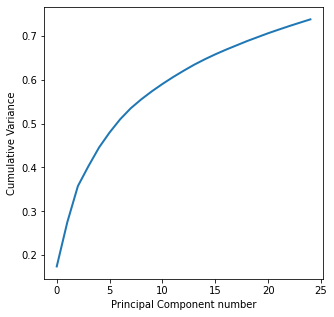

In [29]:
# Θα τυπωσουμε το συσσωρευτικό ποσοστό διασποράς που εξηγείται από τις κύριες συνιστώσες
evar = pca.explained_variance_ratio_
cum_evar = np.cumsum(evar)
print(cum_evar)
plt.figure(1, figsize=(5, 5))
plt.xlabel("Principal Component number")
plt.ylabel('Cumulative Variance')
plt.plot(cum_evar, linewidth=2)
plt.show()

Με μόλις 15 κύριες συνιστώσες εξηγούμε 55% της διακύμανσης (πληροφορίας) του dataset, με 25 κοντά στο 70%.

Τέλος, ας εφαρμόσουμε την PCA στα δεδομένα και ας ξανα
πάρουμε τα metrics του MLP:

In [30]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)
clf.fit(trainPCA, trainTargets_resampled)
preds = clf.predict(testPCA)
print(classification_report(C_testDataTargets, preds))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.89      0.80      0.84        30
           2       0.67      0.97      0.79        30
           3       0.87      0.77      0.82        26
           4       0.97      0.90      0.93        31

   micro avg       0.85      0.88      0.86       159
   macro avg       0.86      0.87      0.86       159
weighted avg       0.86      0.88      0.87       159
 samples avg       0.86      0.88      0.87       159



/home/chris/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/chris/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ΠΑΡΑΤΗΡΗΣΕΙΣ**
* Στο συγκεκριμένο παράδειγμα, το MLP δουλεύει καλύτερα γιατί εφαρμόσαμε 4 μετασχηματιστές επεξεργασίας (variance threshold, standard scaler, oversampling, pca). Πιθανότατα το καθοριστικότερο ήταν η μείωση της διαστατικότητας γιατί ο λόγος samples / number of features είναι αρκετά μικρός (τυπικά έχουμε πολλαπλάσια ή τάξη μεγέθους περισσότερα samples από features.
* Το ποιους μετασχηματιστές προεπεξεργασίας θα εφαρμόσουμε και ποιες τιμές των παραμέτρων τους (variance threshold, αριθμός κυρίων συνιστωσών) θα αποδώσουν καλύτερα δεν το ξέρουμε από την αρχή, και μπορεί να είναι διαφορετικό ανάλογα τον ταξινομητή, ακόμα και στο ίδιο dataset. Έχουμε μόνο κάποιες εμπειρικές γνώσεις όπως ότι η κανονικοποίηση γενικά βοηθάει, ότι τα samples πρέπει να είναι αρκετά περισσότερα από τα features κλπ


